In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [16]:
x,y,z,sx,sy,sz,H = np.loadtxt('seq_out.txt').T
S = (sx**2+sy**2+sz**2)**0.5
print('Total energy of system',H[0])
print(f'Total x spin: {np.sum(sx):.1f}\nTotal y spin: {np.sum(sy):.1f}\nTotal z spin: {np.sum(sz):.1f}')
print('Number of spins: ',len(S))

Total energy of system 18913900.0
Total x spin: -213.1
Total y spin: 225.5
Total z spin: 570.5
Number of spins:  2500


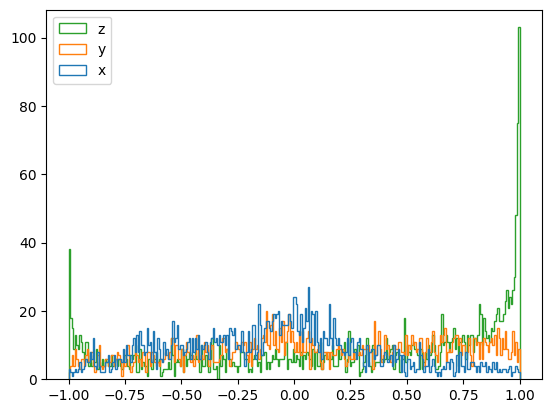

In [17]:
#plt.hist(S,300,histtype = 'step');
#plt.yscale('log')
#plt.show()
plt.hist([sx,sy,sz],300,histtype = 'step',label = ['x','y','z']);
plt.legend()

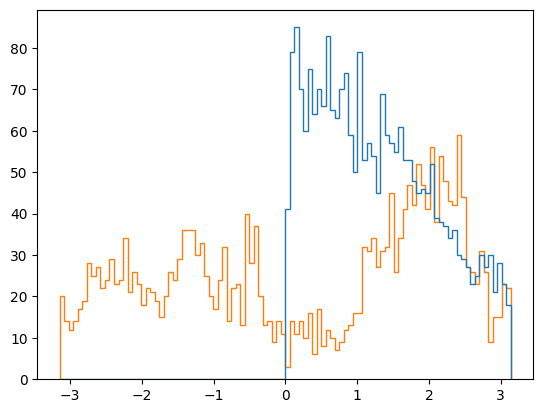

In [18]:
plt.hist([np.arccos(sz/S),np.sign(sy)*np.arccos(sx/np.sqrt(sx**2+sy**2))],100,histtype='step',label = ['theta','phi']);


In [26]:

xx = sx.reshape((50,50))
yy = sy.reshape((50,50))
zz = sz.reshape((50,50))

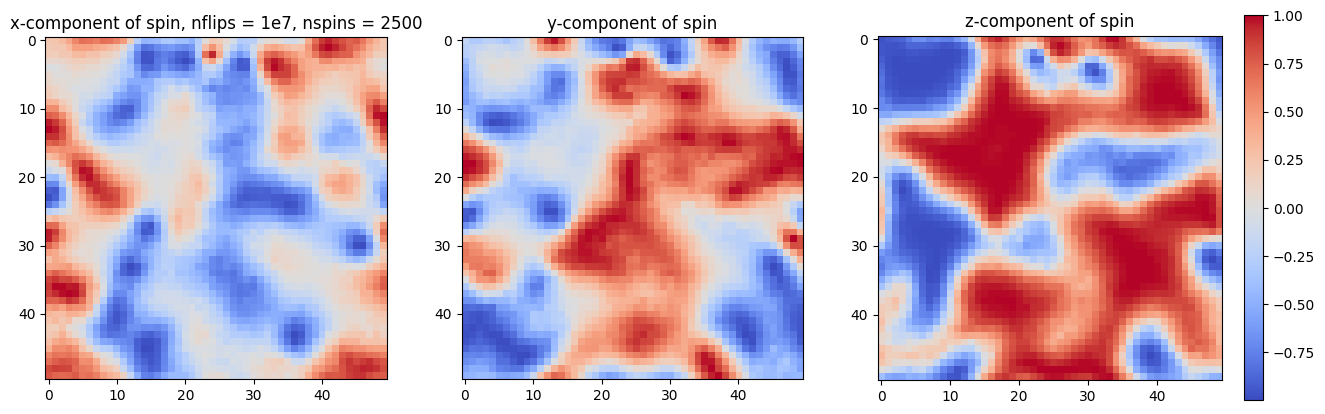

In [33]:
fig,ax = plt.subplots(1,3,figsize = (16.3,5),gridspec_kw ={'width_ratios':[5,5,6.3]})
ax[0].imshow(xx,cmap = 'coolwarm')
ax[1].imshow(yy,cmap = 'coolwarm')
im=ax[2].imshow(zz,cmap = 'coolwarm')
ax[0].set_title('x-component of spin, nflips = 1e7, nspins = 2500')
ax[1].set_title('y-component of spin')
ax[2].set_title('z-component of spin')
fig.colorbar(im,ax = ax[2])
plt.savefig('xcomp.png')